In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Read csv and sort by timestamp

In [ ]:
df = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera-export-20190609-20191123.csv',
                  names=["timestamp", "Rad", "Tamb", "Tmod","Pa1"],parse_dates=['timestamp']).sort_values(by='timestamp', ascending=True)


In [ ]:
df.dtypes

timestamp    datetime64[ns, UTC]
Rad                      float64
Tamb                     float64
Tmod                     float64
Pa1                      float64
dtype: object

In [ ]:
df.describe()

,Rad,Tamb,Tmod,Pa1
count,364674.000000,364674.000000,364674.000000,364674.000000
mean,226.008609,19.070904,22.861347,6678.389420
std,311.289574,7.612995,14.273408,8847.618759
min,0.000000,-2.000000,-5.000000,0.000000
25%,0.000000,13.900000,12.500000,0.800000
50%,14.600000,19.000000,18.500000,443.940000
75%,439.500000,24.300000,33.800000,13384.535000
max,1135.300000,42.600000,59.000000,31230.000000


In [ ]:
df = df.set_index('timestamp')
df.head()

,Rad,Tamb,Tmod,Pa1
timestamp,,,,
2019-06-09 00:00:17.444000+00:00,0.0,17.5,15.7,0.0
2019-06-09 00:00:47.467000+00:00,0.0,17.3,15.7,0.0
2019-06-09 00:01:17.491000+00:00,0.0,17.5,15.7,0.0
2019-06-09 00:01:47.515000+00:00,0.0,17.5,15.5,0.0
2019-06-09 00:02:17.539000+00:00,0.0,17.5,15.7,0.0


Resample to 10 minutes

In [ ]:
df_avg_10=df.resample('10min', label='right').mean()
df_max_10=df.resample('10min', label='right').max()
df_min_10=df.resample('10min', label='right').min()
df_std_10=df.resample('10min', label='right').std()

1 window of 10 minutes

In [ ]:
df_sample_1w_10min = pd.merge_ordered(
    pd.merge_ordered(
        pd.merge_ordered(
            df_avg_10, df_max_10.drop('Pa1',1), on='timestamp', suffixes=('_avg','_max')
        ),
        df_min_10.drop('Pa1',1), on='timestamp', suffixes=('','_min')
    ),
    df_std_10.drop('Pa1',1), on='timestamp', suffixes=('_min','_std')
).set_index('timestamp')

df_sample_1w_10min=df_sample_1w_10min[[c for c in df_sample_1w_10min if c not in ['Pa1']] 
       + ['Pa1']].dropna()

In [ ]:
df_sample_1w_10min.describe()

,Rad_avg,Tamb_avg,Tmod_avg,Rad_max,Tamb_max,Tmod_max,Rad_min,Tamb_min,Tmod_min,Rad_std,Tamb_std,Tmod_std,Pa1
count,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000,24031.000000
mean,227.518025,19.101040,22.930385,246.389181,19.601569,23.355686,207.431484,18.639378,22.505664,12.969266,0.300588,0.277899,6723.448869
std,309.812979,7.595366,14.280690,326.773839,7.844263,14.478770,296.378810,7.376000,14.089189,36.865940,0.281078,0.298295,8809.917262
min,0.000000,-1.681250,-4.961538,0.000000,-1.300000,-4.900000,0.000000,-2.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.990833,12.491667,0.000000,14.300000,12.800000,0.000000,13.800000,12.200000,0.000000,0.112361,0.102470,0.838675
50%,15.489474,18.978571,18.570000,23.200000,19.400000,18.800000,8.500000,18.600000,18.200000,2.645720,0.187487,0.166208,566.548125
75%,446.347917,24.382292,33.993333,510.300000,25.100000,34.800000,372.900000,23.800000,33.200000,8.694763,0.406176,0.357919,13600.152250
max,1054.691667,41.243750,58.208333,1135.300000,42.600000,59.000000,1033.900000,39.700000,57.800000,405.548104,3.438446,3.627671,28472.307692


Save to Drive



In [ ]:
df_sample_1w_10min.to_csv('/content/drive/My Drive/Profesional/_Proyecto Ópera/Data Science/opera_dataset_1w_10min.csv')

3 windows 10 minutes each, total 30 minutes

In [ ]:
df_w2 = df_sample_1w_10min.drop('Pa1',1).shift(1, axis=0)
df_w3 = df_sample_1w_10min.drop('Pa1',1).shift(2, axis=0)

df_sample_3w_30min=df_sample_1w_10min.merge(df_w2, on="timestamp", suffixes=('','_w2'))\
.merge(df_w3, on="timestamp", suffixes=('','_w3'))

df_sample_3w_30min=df_sample_3w_30min[[c for c in df_sample_3w_30min if c not in ['Pa1']] 
       + ['Pa1']].dropna()


Validate data

In [ ]:
df_sample_3w_30min.describe()

,Rad_avg,Tamb_avg,Tmod_avg,Rad_max,Tamb_max,Tmod_max,Rad_min,Tamb_min,Tmod_min,Rad_std,Tamb_std,Tmod_std,Rad_avg_w2,Tamb_avg_w2,Tmod_avg_w2,Rad_max_w2,Tamb_max_w2,Tmod_max_w2,Rad_min_w2,Tamb_min_w2,Tmod_min_w2,Rad_std_w2,Tamb_std_w2,Tmod_std_w2,Rad_avg_w3,Tamb_avg_w3,Tmod_avg_w3,Rad_max_w3,Tamb_max_w3,Tmod_max_w3,Rad_min_w3,Tamb_min_w3,Tmod_min_w3,Rad_std_w3,Tamb_std_w3,Tmod_std_w3,Pa1
count,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000,24029.000000
mean,227.536962,19.101190,22.930987,246.409688,19.601744,23.356311,207.448749,18.639506,22.506247,12.970345,0.300605,0.277914,227.536962,19.101525,22.931329,246.409688,19.602085,23.356644,207.448749,18.639848,22.506600,12.970345,0.300603,0.277907,227.536962,19.101869,22.931688,246.409688,19.602430,23.357002,207.448749,18.640189,22.506958,12.970345,0.300604,0.277907,6724.008480
std,309.818919,7.595664,14.281132,326.779706,7.844566,14.479211,296.385102,7.376294,14.089631,36.867284,0.281084,0.298303,309.818919,7.595404,14.280861,326.779706,7.844297,14.478947,296.385102,7.376033,14.089348,36.867284,0.281085,0.298305,309.818919,7.595137,14.280570,326.779706,7.844021,14.478654,296.385102,7.375772,14.089061,36.867284,0.281084,0.298305,8810.070347
min,0.000000,-1.681250,-4.961538,0.000000,-1.300000,-4.900000,0.000000,-2.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,-1.681250,-4.961538,0.000000,-1.300000,-4.900000,0.000000,-2.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,-1.681250,-4.961538,0.000000,-1.300000,-4.900000,0.000000,-2.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.990000,12.491667,0.000000,14.300000,12.800000,0.000000,13.800000,12.200000,0.000000,0.112361,0.102470,0.000000,13.991667,12.491667,0.000000,14.300000,12.800000,0.000000,13.800000,12.200000,0.000000,0.112361,0.102470,0.000000,13.992857,12.491667,0.000000,14.300000,12.800000,0.000000,13.800000,12.200000,0.000000,0.112361,0.102470,0.840625
50%,15.511765,18.980000,18.573684,23.200000,19.400000,18.800000,8.500000,18.600000,18.200000,2.645751,0.187487,0.166208,15.511765,18.980000,18.573684,23.200000,19.400000,18.800000,8.500000,18.600000,18.200000,2.645751,0.187487,0.166208,15.511765,18.980000,18.573684,23.200000,19.400000,18.800000,8.500000,18.600000,18.200000,2.645751,0.187487,0.166208,566.950000
75%,446.383333,24.383333,34.000000,510.300000,25.100000,34.800000,373.500000,23.800000,33.200000,8.695209,0.406202,0.357919,446.383333,24.383333,34.000000,510.300000,25.100000,34.800000,373.500000,23.800000,33.200000,8.695209,0.406202,0.357919,446.383333,24.383333,34.000000,510.300000,25.100000,34.800000,373.500000,23.800000,33.200000,8.695209,0.406202,0.357919,13602.304500
max,1054.691667,41.243750,58.208333,1135.300000,42.600000,59.000000,1033.900000,39.700000,57.800000,405.548104,3.438446,3.627671,1054.691667,41.243750,58.208333,1135.300000,42.600000,59.000000,1033.900000,39.700000,57.800000,405.548104,3.438446,3.627671,1054.691667,41.243750,58.208333,1135.300000,42.600000,59.000000,1033.900000,39.700000,57.800000,405.548104,3.438446,3.627671,28472.307692


Save to drive

In [ ]:
df_sample_3w_30min.to_csv('/content/drive/My Drive/Profesional/_Proyecto Ópera/Data Science/opera_dataset_3w_30min.csv')

3 windows of 10min, 20min and 60min, total 90min

In [ ]:

df_avg_20=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('20min').mean()[::-20].sort_values(by='timestamp', ascending=True)
df_max_20=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('20min').max()[::-20].sort_values(by='timestamp', ascending=True)
df_min_20=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('20min').min()[::-20].sort_values(by='timestamp', ascending=True)
df_std_20=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('20min').std()[::-20].sort_values(by='timestamp', ascending=True)

df_avg_60=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('60min').mean()[::-20].sort_values(by='timestamp', ascending=True)
df_max_60=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('60min').max()[::-20].sort_values(by='timestamp', ascending=True)
df_min_60=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('60min').min()[::-20].sort_values(by='timestamp', ascending=True)
df_std_60=df.drop('Pa1',1).resample('30s', label='right').mean().rolling('60min').std()[::-20].sort_values(by='timestamp', ascending=True)


In [ ]:
df_avg_60

,Rad,Tamb,Tmod
timestamp,,,
2019-06-09 00:10:00+00:00,0.000000e+00,17.362500,15.668750
2019-06-09 00:20:00+00:00,0.000000e+00,17.300000,15.693750
2019-06-09 00:30:00+00:00,0.000000e+00,17.255102,15.706122
2019-06-09 00:40:00+00:00,0.000000e+00,17.288333,15.681667
2019-06-09 00:50:00+00:00,0.000000e+00,17.273529,15.657353
...,...,...,...
2019-11-22 23:20:00+00:00,6.003971e-12,9.123529,7.024706
2019-11-22 23:30:00+00:00,5.799290e-12,9.110227,7.011364
2019-11-22 23:40:00+00:00,5.547147e-12,9.079348,6.983696


In [ ]:
df_w2_20 = pd.merge_ordered(
    pd.merge_ordered(
        pd.merge_ordered(
            df_avg_20, df_max_20, on='timestamp', suffixes=('_avg','_max')
        ),
        df_min_20, on='timestamp', suffixes=('','_min')
    ),
    df_std_20, on='timestamp', suffixes=('_min','_std')
).set_index('timestamp').shift(1, axis=0)

df_w3_60 = pd.merge_ordered(
    pd.merge_ordered(
        pd.merge_ordered(
            df_avg_60, df_max_60, on='timestamp', suffixes=('_avg','_max')
        ),
        df_min_60, on='timestamp', suffixes=('','_min')
    ),
    df_std_60, on='timestamp', suffixes=('_min','_std')
).set_index('timestamp').shift(3, axis=0)

df_sample_3w_90min=df_sample_1w_10min.merge(df_w2_20,how='left', on="timestamp", suffixes=('','_w2'))\
.merge(df_w3_60, how='left', on="timestamp", suffixes=('','_w3'))

df_sample_3w_90min=df_sample_3w_90min[[c for c in df_sample_3w_90min if c not in ['Pa1']] 
       + ['Pa1']].dropna()

Validate data

In [ ]:
df_sample_3w_90min.describe()

,Rad_avg,Tamb_avg,Tmod_avg,Rad_max,Tamb_max,Tmod_max,Rad_min,Tamb_min,Tmod_min,Rad_std,Tamb_std,Tmod_std,Rad_avg_w2,Tamb_avg_w2,Tmod_avg_w2,Rad_max_w2,Tamb_max_w2,Tmod_max_w2,Rad_min_w2,Tamb_min_w2,Tmod_min_w2,Rad_std_w2,Tamb_std_w2,Tmod_std_w2,Rad_avg_w3,Tamb_avg_w3,Tmod_avg_w3,Rad_max_w3,Tamb_max_w3,Tmod_max_w3,Rad_min_w3,Tamb_min_w3,Tmod_min_w3,Rad_std_w3,Tamb_std_w3,Tmod_std_w3,Pa1
count,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,2.402400e+04,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,2.402400e+04,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000,24024.000000
mean,227.422501,19.100098,22.926838,246.293902,19.600649,23.352127,207.341321,18.638432,22.502152,12.967721,0.300590,0.277868,2.274406e+02,19.100605,22.928142,256.335290,19.832667,23.703251,196.484482,18.444951,22.160023,17.995430,0.384910,0.469102,2.275360e+02,19.102384,22.932123,285.900895,20.444460,24.861393,168.151944,17.964344,21.059786,32.101212,0.620527,1.098985,6721.082688
std,309.697586,7.595900,14.278366,326.662206,7.844823,14.476415,296.274479,7.376514,14.086933,36.868393,0.281100,0.298249,3.088291e+02,7.589108,14.268854,333.708141,7.938262,14.625278,288.417037,7.302937,13.929778,41.505620,0.336899,0.498885,3.065146e+02,7.566037,14.208374,350.902273,8.119927,15.005761,266.351341,7.159773,13.449334,50.180005,0.454279,1.039127,8807.372705
min,0.000000,-1.681250,-4.961538,0.000000,-1.300000,-4.900000,0.000000,-2.000000,-5.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.636111,-4.896552,0.000000,-1.300000,-4.600000,0.000000,-2.000000,-5.000000,0.000000,0.044096,0.029424,0.000000e+00,-1.496739,-4.698750,0.000000,-1.200000,-4.300000,0.000000,-2.000000,-5.000000,0.000000,0.058096,0.051823,0.000000
25%,0.000000,13.989375,12.489375,0.000000,14.300000,12.800000,0.000000,13.800000,12.200000,0.000000,0.112361,0.102470,9.165491e-12,14.003038,12.502083,0.000000,14.400000,12.900000,0.000000,13.500000,12.100000,0.000000,0.146192,0.136726,4.098610e-12,14.024346,12.544535,0.000000,14.900000,13.400000,0.000000,13.300000,11.700000,0.000000,0.275050,0.301862,0.840191
50%,15.485362,18.978175,18.569375,23.200000,19.400000,18.800000,8.500000,18.600000,18.200000,2.644493,0.187487,0.166208,1.554686e+01,18.987298,18.548214,26.900000,19.600000,19.100000,6.100000,18.500000,18.000000,3.777230,0.265935,0.287194,1.763878e+01,19.006143,18.615720,47.600000,20.200000,20.100000,0.000000,18.000000,17.100000,8.755790,0.513675,0.708570,566.496875
75%,446.148897,24.381250,33.982366,509.325000,25.100000,34.800000,372.300000,23.800000,33.200000,8.694540,0.406151,0.357919,4.488238e+02,24.370635,34.081250,540.800000,25.300000,35.500000,332.000000,23.500000,32.400000,16.796823,0.523258,0.645506,4.486635e+02,24.343834,33.946831,617.700000,26.100000,37.800000,240.500000,23.000000,30.100000,49.485456,0.830679,1.665825,13597.181042
max,1054.691667,41.243750,58.208333,1135.300000,42.600000,59.000000,1027.800000,39.700000,57.800000,405.548104,3.438446,3.627671,1.046200e+03,40.521875,58.182143,1135.300000,42.600000,59.000000,1003.400000,38.800000,57.100000,366.780597,4.710306,7.441420,1.040711e+03,40.011702,57.371111,1135.300000,42.600000,59.000000,1033.900000,38.000000,56.400000,355.379310,5.347213,9.468138,28472.307692


In [ ]:
df_sample_3w_90min

,Rad_avg,Tamb_avg,Tmod_avg,Rad_max,Tamb_max,Tmod_max,Rad_min,Tamb_min,Tmod_min,Rad_std,Tamb_std,Tmod_std,Rad_avg_w2,Tamb_avg_w2,Tmod_avg_w2,Rad_max_w2,Tamb_max_w2,Tmod_max_w2,Rad_min_w2,Tamb_min_w2,Tmod_min_w2,Rad_std_w2,Tamb_std_w2,Tmod_std_w2,Rad_avg_w3,Tamb_avg_w3,Tmod_avg_w3,Rad_max_w3,Tamb_max_w3,Tmod_max_w3,Rad_min_w3,Tamb_min_w3,Tmod_min_w3,Rad_std_w3,Tamb_std_w3,Tmod_std_w3,Pa1
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-09 00:40:00+00:00,0.0,17.436364,15.572727,0.0,17.7,15.8,0.0,17.1,15.4,0.0,0.185864,0.127208,0.000000e+00,17.203030,15.724242,0.0,17.5,15.9,0.0,16.9,15.5,0.0,0.095147,0.079177,0.000000e+00,17.362500,15.668750,0.0,17.5,15.8,0.0,17.1,15.5,0.0,0.120416,0.087321,0.000000
2019-06-09 00:50:00+00:00,0.0,17.162500,15.475000,0.0,17.3,15.7,0.0,16.9,15.3,0.0,0.140789,0.116496,0.000000e+00,17.275000,15.667857,0.0,17.7,15.8,0.0,16.9,15.4,0.0,0.187824,0.115642,0.000000e+00,17.300000,15.693750,0.0,17.5,15.9,0.0,17.1,15.5,0.0,0.121814,0.098169,0.000000
2019-06-09 01:00:00+00:00,0.0,16.893750,15.443750,0.0,17.2,15.7,0.0,16.7,15.2,0.0,0.184278,0.189627,0.000000e+00,17.321053,15.531579,0.0,17.7,15.8,0.0,16.9,15.3,0.0,0.214939,0.129326,0.000000e+00,17.255102,15.706122,0.0,17.5,15.9,0.0,16.9,15.5,0.0,0.127576,0.085167,0.000000
2019-06-09 01:10:00+00:00,0.0,16.600000,15.091667,0.0,16.7,15.3,0.0,16.4,14.9,0.0,0.127920,0.137895,0.000000e+00,16.983333,15.454167,0.0,17.3,15.7,0.0,16.7,15.2,0.0,0.211961,0.166757,0.000000e+00,17.288333,15.681667,0.0,17.7,15.9,0.0,16.9,15.4,0.0,0.155238,0.106551,0.000000
2019-06-09 01:20:00+00:00,0.0,16.500000,15.050000,0.0,16.7,15.2,0.0,16.3,14.9,0.0,0.124035,0.101905,0.000000e+00,16.767857,15.292857,0.0,17.2,15.7,0.0,16.4,14.9,0.0,0.217824,0.243324,0.000000e+00,17.273529,15.657353,0.0,17.7,15.9,0.0,16.9,15.3,0.0,0.157989,0.126156,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-22 23:20:00+00:00,0.0,9.056250,6.981250,0.0,9.2,7.2,0.0,8.8,6.9,0.0,0.115289,0.075000,1.049774e-11,9.093750,6.893750,0.0,9.3,7.2,0.0,8.9,6.7,0.0,0.131830,0.131830,5.865949e-12,9.213793,7.131034,0.0,9.5,7.5,0.0,8.9,6.9,0.0,0.113273,0.155002,0.343750
2019-11-22 23:30:00+00:00,0.0,9.081250,6.950000,0.0,9.3,7.2,0.0,8.8,6.9,0.0,0.151520,0.081650,1.049774e-11,9.093750,6.906250,0.0,9.3,7.2,0.0,8.8,6.7,0.0,0.138977,0.110534,5.734130e-12,9.178652,7.108989,0.0,9.5,7.5,0.0,8.9,6.8,0.0,0.125655,0.170987,0.000000
2019-11-22 23:40:00+00:00,0.0,9.081250,7.031250,0.0,9.3,7.2,0.0,8.8,6.9,0.0,0.160078,0.087321,1.049774e-11,9.068750,6.965625,0.0,9.3,7.2,0.0,8.8,6.9,0.0,0.133047,0.078738,5.799290e-12,9.159091,7.062500,0.0,9.5,7.5,0.0,8.9,6.7,0.0,0.136151,0.201325,0.000000


Save to csv in Drive

In [ ]:
df_sample_3w_90min.to_csv('/content/drive/My Drive/Profesional/_Proyecto Ópera/Data Science/opera_dataset_3w_90min.csv')

Visualise data

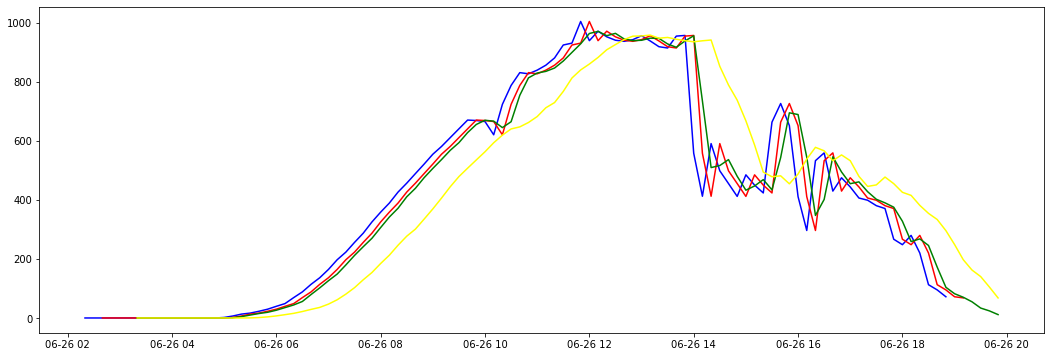

In [ ]:
plt.figure(figsize=[18, 6])
plt.plot(df_sample_1w_10min['Rad_avg'][2450:2550], color="blue",label="dataset1")
plt.plot(df_sample_3w_30min['Rad_avg_w2'][2450:2550], color="red",label="dataset2")
plt.plot(df_sample_3w_90min['Rad_avg_w2'][2450:2550], color="green",label="dataset3")
plt.plot(df_sample_3w_90min['Rad_avg_w3'][2450:2550], color="yellow",label="dataset3")
